# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Открываем файл с данными и изучаем общую информацию. 

In [1]:
#импортируем библиотеку
import pandas as pd

In [2]:
#читаем файл с данными и сохраняем его в flat
flat = pd.read_csv('C:/Users/asus/Downloads/real_estate_data.csv', sep='\t')

In [3]:
#получим первые 10 строк таблицы
flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#получим общую информацию о данных
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы получили таблицу из 22 столбцов.
2 столбца имеют bool тип, 3 с типом object, у 3-х тип int64, а остальные 14 с типом float64.
Почти половина столбцов имеют меньшее количество значений, это означает, что в них есть пропущенные значения. Пропущенные значения, вероятно, связаны с тем, что не в каждом объявлении о продаже квартир были заполнены все данные.

* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах(м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

### Шаг 2. Предобработка данных

In [5]:
#получим суммарное значение пропусков в каждом столбце
flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#заполнимим пропущенные значения в столбце с выстотой потолков на медиану
flat['ceiling_height'] = flat['ceiling_height'].fillna(flat['ceiling_height'].median())

In [7]:
#примем количество этажей в доме на значение этажа квартиры, т.е. представим, что квартира находится на последнем этаже
flat['floors_total'] = flat['floors_total'].fillna(flat['floor'])

In [8]:
#получим числовое описание столбца с общей площадью
flat['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [9]:
#заменим пропущенные значения в столбце с площадью кухни на значения, в соответствии с общей площадью квартиры
for total_area in range(len(flat)):
    if total_area < 40:
        flat['kitchen_area'] = flat['kitchen_area'].fillna(5)
    if total_area < 52:
        flat['kitchen_area'] = flat['kitchen_area'].fillna(10)
    if total_area < 69:
        flat['kitchen_area'] = flat['kitchen_area'].fillna(12)
    if total_area < 900:
        flat['kitchen_area'] = flat['kitchen_area'].fillna(40)

In [10]:
#заменим пропущенные значения в столбце 'balcony' на 0
flat['balcony'] = flat['balcony'].fillna(0)

In [11]:
#заполним пропущенные значения в столбце с жилой площадью на разницу общей площади квартиры и кухни
flat['living_area'] = flat['living_area'].fillna(flat['total_area'] - flat['kitchen_area'] - flat['balcony']*3)

In [12]:
#проверим уникальные значения в столбце 'is_apartment'
flat['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [13]:
#заменим пропущенные значения на False
flat['is_apartment'] = flat['is_apartment'].fillna(False)

In [14]:
#удалим все строки с пропущенными значениями в столбце с населенным пунктом
flat.dropna(subset=['locality_name'], inplace=True)

In [15]:
#в столбце с количеством парков поблизости заменим пропущенные значения на ноль
flat['parks_around3000'] = flat['parks_around3000'].fillna(0)

In [16]:
#заменим на ноль расстояние до парка, если в столбце с количеством парков их нет
for parks_around3000 in range(len(flat)):
    if parks_around3000 == 0:
        flat['parks_nearest'] = flat['parks_nearest'].fillna(0)      

In [17]:
#заменим на ноль пропущенные значения в столбце с водоемами
flat['ponds_around3000'] = flat['ponds_around3000'].fillna(0)

In [18]:
#если в данных количество водоемов ноль, то в столбце с расстоянием до них поставим 0
for ponds_around3000 in range(len(flat)):
    if ponds_around3000 == 0:
        flat['ponds_nearest'] = flat['ponds_nearest'].fillna(0)

In [19]:
#заменим пропущенные значения в столбце с количеством дней размещения объявления на 1
flat['days_exposition'] = flat['days_exposition'].fillna(1)

In [20]:
#заменим пропущенные значения в столбце с расстоянием до центра на 0
flat['cityCenters_nearest'] = flat['cityCenters_nearest'].fillna(0)

In [21]:
#заменим пропущенные значения в столбце с расстоянием до аропорта на 0
flat['airports_nearest'] = flat['airports_nearest'].fillna(0)

In [22]:
#проверим наличие дубликатов
flat.duplicated().sum()

0

In [23]:
#проверим пропущенные значения
flat.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [24]:
#изменим тип данных float на тип int
flat['last_price'] = flat['last_price'].astype('int')
flat['total_area'] = flat['total_area'].astype('int')
flat['ceiling_height'] = flat['ceiling_height'].astype('int')
flat['floors_total'] = flat['floors_total'].astype('int')
flat['living_area'] = flat['living_area'].astype('int')
flat['kitchen_area'] = flat['kitchen_area'].astype('int')
flat['balcony'] = flat['balcony'].astype('int')
flat['airports_nearest'] = flat['airports_nearest'].astype('int')
#flat['cityCenters_nearest'] = flat['cityCenters_nearest'].astype('int')
flat['parks_around3000'] = flat['parks_around3000'].astype('int')
flat['parks_nearest'] = flat['parks_nearest'].astype('int')
flat['ponds_around3000'] = flat['ponds_around3000'].astype('int')
flat['ponds_nearest'] = flat['ponds_nearest'].astype('int')
flat['days_exposition'] = flat['days_exposition'].astype('int')


In [25]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int32
total_area              23650 non-null int32
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null int32
floors_total            23650 non-null int32
living_area             23650 non-null int32
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int32
balcony                 23650 non-null int32
locality_name           23650 non-null object
airports_nearest        23650 non-null int32
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int32
parks_nearest           23650 non-null int32
ponds_around3000        23650 non-n

### Вывод
На данном этапе мы проверили и заполнили пропущенные значения в столбцах.
* В столбце с высотой потолков заполнили пропуски на медиану, чтобы не учитывать редкие значения. Вероятно, пропущенные значения там появились, так как данные о высоте потолков были изначально не указаны в объявлении.
* В столбце с количеством этажей в доме, предположили, что этаж конктретной квартиры соответствует последнему этажу, или он там единственный, скорее всего данные так же были не указаны в объявлении.
* Заполнили пропущенные значения в столбце с площадью кухни в соответствии с общей площадью квартиры. Для этого мы разбили данные об общей площади на квартили и применили для заполнения данных о площади кухни.
* В столбце с количеством балконов заменили значения на 0, вероятно, в объявлении не было указано количество балконов, так как их по факту и нет в квартире.
* Общую жилую площадь мы рассчитали по разнице общей площади, площади кухни и количества балконов, умноженного на 3, так как приняли площадь балкона за 3 метра.
* В столбце со значениями нежилых помещений, которые переделали в жилые, заполним пропущенные значения на False, так как в объявлении скорее всего, для квартир из нежилых помещений, был указан факт изменений, соответственно все остальные квартиры изначально были жилыми помещениями.
* Удалим строки в столбце с названием населенного пункта, где есть хоть одно пропущенное значение, так как их всего 49, они не сильно повлияют на общие данные.
* В столбцах с количеством парков и водоемов поблизости, заменили пропущенные значения на 0, так как их вероятно вблизи и нет.
Таким образом и заполнили значения на 0 в столбцах с расстоянием до них.
* В столбце с количеством дней размещения заменили проуски на 1, так как возможно объявление не прошло модерацию или было удалено сразу после публикации.
* Пропуски в столбцах с расстоянием до аэропорта и центра заполнили 0, возможно эта информация не была просто указана в объявлениях или расстояние до них слишком большое и не оценивалось.
* Дубликатов не было выявлено в данных. Тип данных float в каждом столбце мы заменили на int, чтобы все значения были целыми числами, для удобства дальнейшей работы с данными.

### Шаг 3. Посчитаем и добавим в таблицу

In [26]:
#добавим столбец, в котором подсчитаем цену квартиры за метр 
flat['price_for_m'] = flat['last_price'] / flat['total_area']
flat['price_for_m'] = flat['price_for_m'].astype('int')
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,0,Санкт-Петербург,18863,16028.0,1,482,2,755,1,120370
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,False,...,2,посёлок Шушары,12817,18603.0,0,0,0,0,81,83750
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92785
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,154,9,False,...,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424,408176
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000


In [27]:
#приведем данные о времени размещения в корректный вид
flat['first_day_exposition'] = pd.DatetimeIndex(flat['first_day_exposition']).year
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m
0,20,13000000,108,2019,3,2,16,51,8,False,...,0,Санкт-Петербург,18863,16028.0,1,482,2,755,1,120370
1,7,3350000,40,2018,1,2,11,18,1,False,...,2,посёлок Шушары,12817,18603.0,0,0,0,0,81,83750
2,10,5196000,56,2015,2,2,5,34,4,False,...,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,92785
3,0,64900000,159,2015,3,2,14,154,9,False,...,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424,408176
4,2,10000000,100,2018,2,3,14,32,13,False,...,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,100000


In [28]:
#сгруппируем данные по трем категориям, в зависимости от этажа
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

flat['floor_group'] = flat.apply(floor_group, axis=1)
flat['floor_group'].value_counts()


другой       17326
последний     3412
первый        2912
Name: floor_group, dtype: int64

In [29]:
#выведем и добавим в таблицу соотношения жилой площади к общей, и площади кухни к общей площади
flat['living_total'] = flat['living_area'] / flat['total_area']
flat['kitchen_total'] = flat['kitchen_area'] / flat['total_area']
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,floor_group,living_total,kitchen_total
0,20,13000000,108,2019,3,2,16,51,8,False,...,16028.0,1,482,2,755,1,120370,другой,0.472222,0.231481
1,7,3350000,40,2018,1,2,11,18,1,False,...,18603.0,0,0,0,0,81,83750,первый,0.450000,0.275000
2,10,5196000,56,2015,2,2,5,34,4,False,...,13933.0,1,90,2,574,558,92785,другой,0.607143,0.142857
3,0,64900000,159,2015,3,2,14,154,9,False,...,6800.0,2,84,3,234,424,408176,другой,0.968553,0.031447
4,2,10000000,100,2018,2,3,14,32,13,False,...,8098.0,2,112,1,48,121,100000,другой,0.320000,0.410000


In [30]:
#импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество')

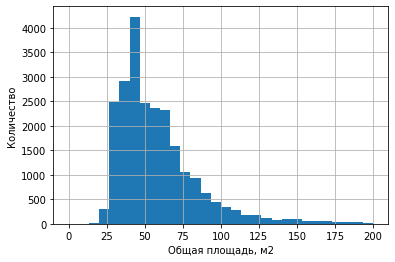

In [31]:
#построим гистограмму по общей площади
flat['total_area'].hist(bins=30, range=(0, 200))
plt.xlabel("Общая площадь, м2")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

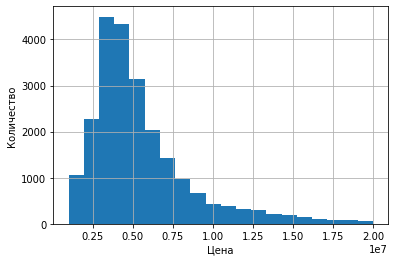

In [32]:
#построим гистрограмму по ценам за квартиры
flat['last_price'].hist(bins=20, range=(1000000, 20000000))
plt.xlabel("Цена")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

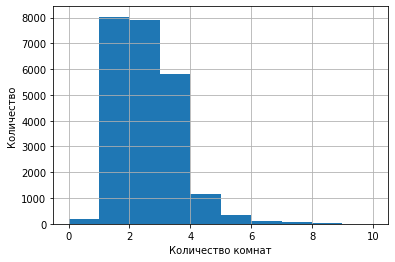

In [33]:
#построим гистограмму по количеству комнат
flat['rooms'].hist(bins=10, range=(0, 10))
plt.xlabel("Количество комнат")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

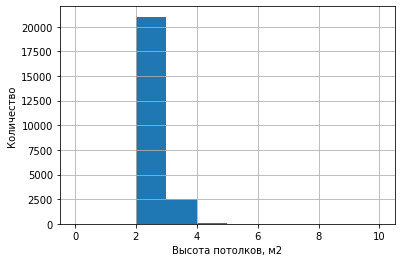

In [34]:
#построим гистограмму по высоте потолков
flat['ceiling_height'].hist(range=(0, 10))
plt.xlabel("Высота потолков, м2")
plt.ylabel("Количество")

### Вывод
На данном этапе работы мы посчитали цену за метр каждой квартиры, добавили ее в таблицу и изменили тип данных на целочисленный.
Отформатировали столбец со временем публикации, т.е. удалили данные о часах и минутах, так как они не несут смысловой нагрузки.
Категоризировали данные с этажностью по трем категориям, это удобно, так как квартиры на первом этаже и на последнем скорее всего отличаются, и по цене, и по спросу на них.
Вывели и добавили в таблицу данные о соотношении жилой площади к общей и площади кухни к общей площади.
Построили и проанализирвали гистограммы для параметров: площадь, цена, количество комнат и высота потолков.
+ На первой гистограмме мы видим, что больше всего в наших данных квартир с площадью 35-40 кв.м.-более 4000 тысяч.
Так же много квартир с площадью от 25 до 70 кв. метров. В то же время квартир площадью 100 кв.м. и больше, гораздо меньше.
+ На второй гистограмме мы видим, что больше всего квартир по цене от 2,5 до 5 млн.руб., чем дороже стоят квартиры, тем меньше их на рынке. Квартир за 1 млн.руб., так же много, как и квартир за 8 млн.руб., а именно порядка 1000 предложений по каждой категории цены.
+ На гистограмме с количеством комнат мы видим, что больше всего 1-2-3-хкомнатных квартир, около 8 тыс. предложений по каждому типу. 4-хкомнатных квартир тоже не мало, около 6 тыс.предложений. А вот квартиры с 5-ю и более комнат встречаются редко, менее 500 предложений за 5 комнат.
+ Четвертая гистограмма нам показывает, что почти все квартиры имеют стандартную высоту потолков-от 2 до 3 метров. Есть порядка 2500 квартир с высокими потолками от 3 до 4 метров.

### Шаг 4. Проведем исследовательский анализ данных

In [35]:
#подсчитаем среднее по столбцу с количеством дней размещения объявления
flat['days_exposition'].mean()

156.5834249471459

In [36]:
#подсчитаем медиану
flat['days_exposition'].median()

73.0

Text(0, 0.5, 'Количество')

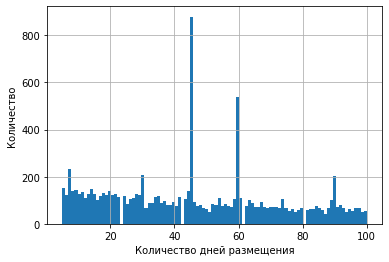

In [37]:
#построим гистограмму по количеству дней размещения
flat['days_exposition'].hist(bins=100, range=(5,100))
plt.xlabel("Количество дней размещения")
plt.ylabel("Количество")

Text(0, 0.5, 'Общая площадь, м2')

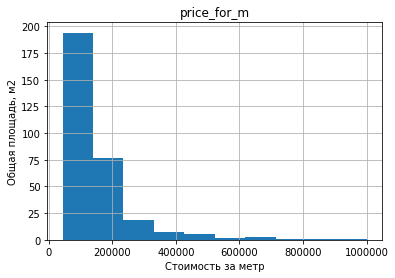

In [38]:
#создадим сводную таблицу по зависимости общей площади от цены за кв.м.
flat_1 = flat.pivot_table(index='total_area', values='price_for_m')
flat_1.hist()
plt.xlabel("Стоимость за метр")
plt.ylabel("Общая площадь, м2")

Text(0, 0.5, 'Количество комнат')

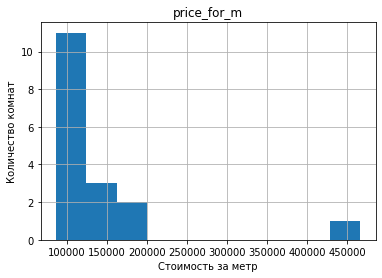

In [39]:
#создадим сводную таблицу по зависимости цены за кв.м. от количества комнат
flat_2 = flat.pivot_table(index='rooms', values='price_for_m')
flat_2.hist()
plt.xlabel("Стоимость за метр")
plt.ylabel("Количество комнат")

Text(0, 0.5, 'Цена')

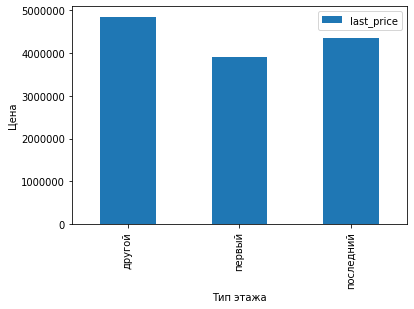

In [40]:
#создадим сводную таблицу по зависимости цены за кв.м. от этажа
flat_floors = flat.pivot_table(index='floor_group', values='last_price', aggfunc='median')
flat_floors.plot(kind='bar')
plt.xlabel("Тип этажа")
plt.ylabel("Цена")

#### Вывод
Мы оценили зависимость цены от разных параметров. Например, чем больше площадь квартиры и количество комнат, тем дешевле ее метр, а так же выяснили, что самые недорогие квартиры на пером этаже. 
Так же мы оценили среднее количество дней размещения и медиану, медиана смещена, это может быть результатом редких значений, например, ошибка в данных с большим количеством дней размещения, а может быть единичные квартиры продавались больше года.
На гистограмме по дням размещениям мы видим выбивающиеся значения на 45 и 60 днях, что может быть результатом работы системы, где размещены объявления, например, тарифы на размещение действуют 45 и 60 дней.

(1000000, 20000000)

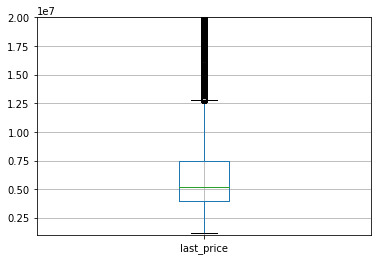

In [41]:
import matplotlib.pyplot as plt
flat_center = flat.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
flat_center.boxplot()
plt.ylim(1000000, 20000000)

Text(0, 0.5, 'Цена за метр')

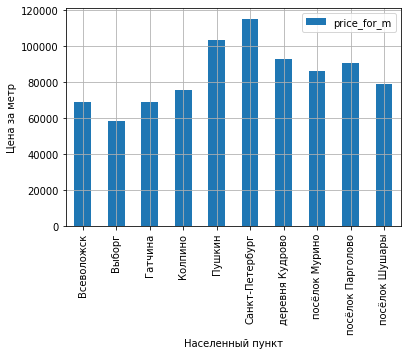

In [42]:
#выбрали 10 населенных пунктов, с наибольшим количеством объявлений и определили в каких их них метр дороже
flat_locality = flat['locality_name'].value_counts().sort_values(ascending=False).head(10)

(flat
     .query('locality_name in @flat_locality.index')
     .pivot_table(index='locality_name', values='price_for_m')
     .plot(kind='bar', grid=True)
)
plt.xlabel("Населенный пункт")
plt.ylabel("Цена за метр")

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Text(0, 0.5, 'Цена за метр')

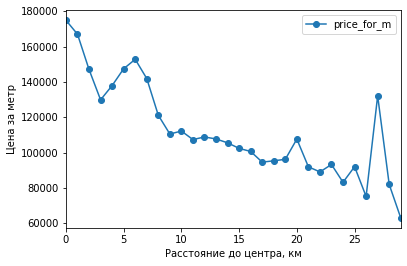

In [43]:
#сделали срез данных по Санкт-Петербургу
#затем удалили пропущенные значения
#добавили столбец с расстоянием в км до центра, перевели его целочисленный тип
#создали сводную таблицу по цене за метр в зависимости от расстояния до центра и построили график
flat_spb = flat.query('locality_name == "Санкт-Петербург"')
flat_spb.dropna(subset=['cityCenters_nearest'], inplace=True)
flat_spb['center_km'] = flat_spb['cityCenters_nearest'] / 1000 
flat_spb['center_km'] = flat_spb['center_km'].astype('int')
spb = flat_spb.pivot_table(index='center_km', values='price_for_m')
spb.plot(style='o-')
plt.xlabel("Расстояние до центра, км")
plt.ylabel("Цена за метр")

In [44]:
#рассчитали коэффициент корреляции для зависимости цены от расстояния до центра
flat_spb['center_km'].corr(flat_spb['price_for_m'])

-0.3138441833258912

Text(0, 0.5, 'Количество')

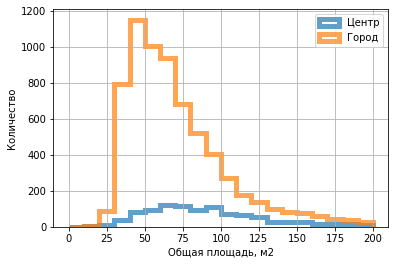

In [45]:
#изучили общую площадь квартир в центре и городе
flat_center = flat_spb.query('center_km <= 3')
center_total_area = flat_center.pivot_table(index='price_for_m', values='total_area', aggfunc='median')
spb_total_area = flat_spb.pivot_table(index='price_for_m', values='total_area', aggfunc='median')

ax = center_total_area.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=20, linewidth=5, alpha=0.7, label='Центр')
spb_total_area.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=20, linewidth=5, alpha=0.7, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Общая площадь, м2")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

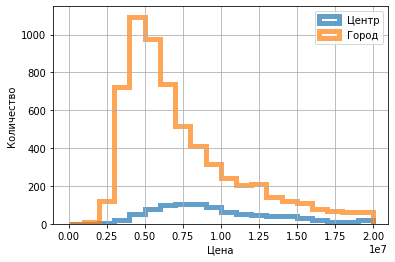

In [46]:
#изучили стоимость квартир в центре и городе
flat_center = flat_spb.query('center_km <= 3')
center_price = flat_center.pivot_table(index='price_for_m', values='last_price', aggfunc='median')
spb_price = flat_spb.pivot_table(index='price_for_m', values='last_price', aggfunc='median')

ax = center_price.plot(kind='hist', y='last_price', histtype='step', range=(0, 20000000), bins=20, linewidth=5, alpha=0.7, label='Центр')
spb_price.plot(kind='hist', y='last_price', histtype='step', range=(0, 20000000), bins=20, linewidth=5, alpha=0.7, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Цена")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

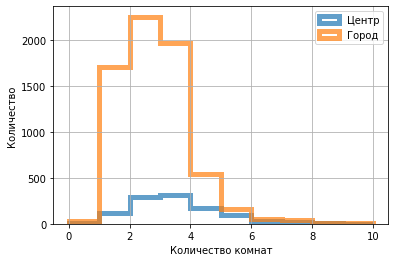

In [47]:
#изучили количество комнат в квартирах в центре и в городе
flat_center = flat_spb.query('center_km <= 3')
center_rooms = flat_center.pivot_table(index='price_for_m', values='rooms', aggfunc='median')
spb_rooms = flat_spb.pivot_table(index='price_for_m', values='rooms', aggfunc='median')

ax = center_rooms.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=10, linewidth=5, alpha=0.7, label='Центр')
spb_rooms.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=10, linewidth=5, alpha=0.7, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Количество комнат")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

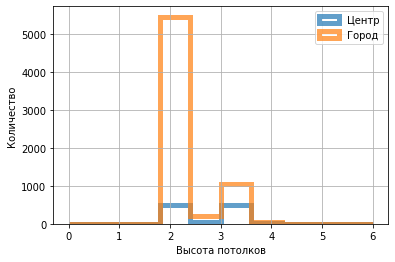

In [48]:
#изучили высоту потолков  в квартирах в центре и в городе
flat_center = flat_spb.query('center_km <= 3')
center_ch = flat_center.pivot_table(index='price_for_m', values='ceiling_height', aggfunc='median')
spb_ch = flat_spb.pivot_table(index='price_for_m', values='ceiling_height', aggfunc='median')

ax = center_ch.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 6), bins=10, linewidth=5, alpha=0.7, label='Центр')
spb_ch.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 6), bins=10, linewidth=5, alpha=0.7, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Высота потолков")
plt.ylabel("Количество")

#### Вывод
Мы выделили 10 населенных пунктов с большим количеством объявлений и выяснили, что дороже всего стоят квартиры в Санкт-Петербурге, дешевле-в Выборге.
Изучили квартиры в Санкт-Петербурге, для начала определим центр города, для этого построим график зависимости цены за квартиру от расстояния до центра, тем самым определили, что за центр можно принять 3 км, дальше будем работать с этими данными при сравнении параметров в центре города и в общем по городу. Мы сравнивали площадь квартир, цены, количество комнат и высоту потолков. В центре квартиры сравнительно больше, значительная часть из низ от 60 до 100 м2, тогда как в общем по городу квартиры в районе 45-50 м2. Квартиры в центре в основном многокомнатные, с высокими потолками и стоят гораздо дороже, чем в общем по городу.

Text(0, 0.5, 'Цена')

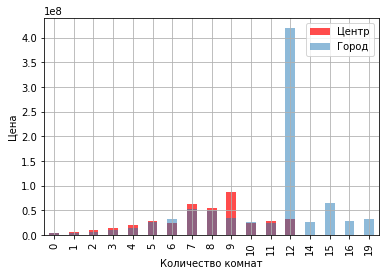

In [49]:
#проанализировали цену на квартиры в центре и в городе в зависимости от количества комнат
flat_center = flat_spb.query('center_km <= 3')
center_rooms_price = flat_center.pivot_table(index='rooms', values='last_price')
spb_rooms_price = flat_spb.pivot_table(index='rooms', values='last_price')

ax = center_rooms_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.7, label='Центр', color='red')
spb_rooms_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.5, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Количество комнат")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

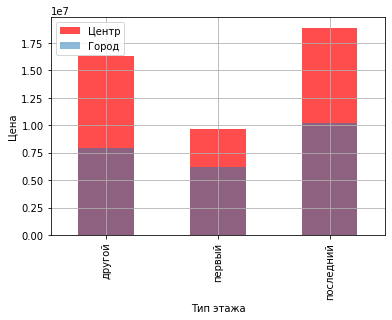

In [50]:
#проанализировали цену на квартиры в центре и в городе в зависимости от этажа
flat_center = flat_spb.query('center_km <= 3')
center_floor_price = flat_center.pivot_table(index='floor_group', values='last_price')
spb_floor_price = flat_spb.pivot_table(index='floor_group', values='last_price')

ax = center_floor_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.7, label='Центр', color='red')
spb_floor_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.5, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Тип этажа")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

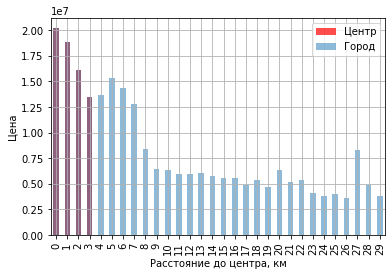

In [51]:
#проанализировали цену на квартиры в зависимости от расстояния до центра
flat_center = flat_spb.query('center_km <= 3')
center_center_price = flat_center.pivot_table(index='center_km', values='last_price')
spb_center_price = flat_spb.pivot_table(index='center_km', values='last_price')

ax = center_center_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.7, label='Центр', color='red')
spb_center_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.5, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Расстояние до центра, км")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

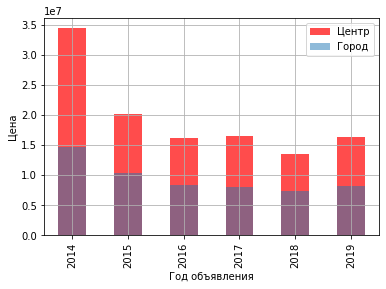

In [52]:
#проанализировали цену на квартиры в центре и в городе в зависимости от года продажи
flat_center = flat_spb.query('center_km <= 3')
center_day_price = flat_center.pivot_table(index='first_day_exposition', values='last_price')
spb_day_price = flat_spb.pivot_table(index='first_day_exposition', values='last_price')

ax = center_day_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.7, label='Центр', color='red')
spb_day_price.plot(kind='bar', y='last_price', linewidth=5, alpha=0.5, label='Город', ax=ax, grid=True, legend=True)
plt.xlabel("Год объявления")
plt.ylabel("Цена")

#### Вывод
Мы проанализировали цену в общем по городу и в центре в зависимости от различных параметров. Например, в центре оказались дороже всего 9-комнатные квартиры, а в общем по городу 12-комнтаные. Квартиры на первом этаже оценивают всегда дешевле, чем квартиры на последнем, это работает для любой территории. С ценами тоже все понятно, чем ближе к центру, тем цены дороже, есть так же значительный рост цены на 27 км от центра, возможно там располагается элитная загородная зона. В 2014 году квартиры стоили значительно дороже, чем в 18-19 годах, это так же одинаково для города и центра.

In [53]:
flat_spb['rooms'].corr(flat_spb['last_price'])

0.37237533826763347

In [54]:
flat_spb['floor'].corr(flat_spb['last_price'])

-0.0008379427208810813

In [55]:
flat_spb['center_km'].corr(flat_spb['last_price'])

-0.2609187620493306

In [56]:
flat_spb['first_day_exposition'].corr(flat_spb['last_price'])

-0.0445905696488536

,center_km,floor,price_for_m,rooms
center_km,1.000000,0.171749,-0.386243,-0.398370
floor,0.171749,1.000000,-0.072001,-0.091855
price_for_m,-0.386243,-0.072001,1.000000,0.257674
rooms,-0.398370,-0.091855,0.257674,1.000000


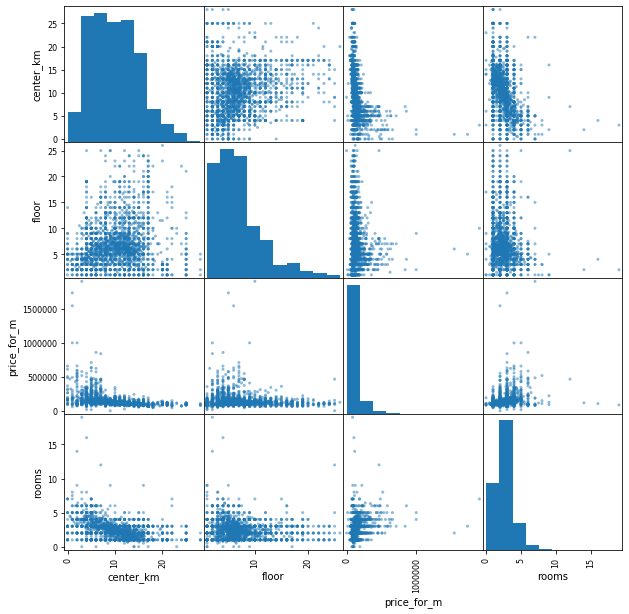

In [57]:
#построили матрицу корреляции
spb = flat_spb.pivot_table(index='last_price', values=['rooms', 'floor', 'center_km', 'price_for_m'])
pd.plotting.scatter_matrix(spb, figsize=(10, 10))
spb.corr()

#### Вывод
Мы рассчитали коэффициенты корелляции для таких параметров как: количество комнат, расстояние до центра, этаж и год размещения объявления. Мы видим, что взаимосвязь выражена слабо, можно выразить разве что при увеличении комнат в квартире, цена на нее увеличивается. А при увеличении расстояния от центра, цена на квартиру снижается.
Из данных по матрице корреляции мы подтверждаем взаимозависимость цены от количества комнат, а так же взаимозависимость цены от расстояния до центра.

### Шаг 5. Общий вывод
* Из анализа данных мы узнали, что в среднем объвления были размещены 156 дней до продажи, чаще всего квартиры покупали через 73 дня после размещения.
На гистограмме по дням размещения мы видим, что есть пики значений на 45 и 60 днях. 
Это, вероятно, связано с тем, что были платные сроки размещения, которые истекали через 45 и 60 дней соответственно. 
* Так же мы видим, на гистограмме зависимости площади от цены, что чем больше площадь квартиры, тем дешевле ее квадратный метр. Самые выгодные квартиры с площадью более 180 метров. По такой же схеме распределены цены в зависимости от количества комнат, чем их больше, чем ниже цена на них. Самый дешевый метр у 4-х и более комнатных квартир, самый дорогой-у 1-2-хкомнатных.
* Проанализировав цену за квартиры в зависимости от этажности квартиры, мы получили вывод, что на первом этаже квартиры стоят дешевле, чем на этажах выше.
* Мы определили 10 населнных пунктов с наибольшим количеством объвлений. На диаграмме видно, что самый дорогой метр в Санкт-Петербурге и Пушкине, а самый дешевый в Выборге, почте в два раза дешевле.
* На графике зависимости цены за метр от расстояния до центра видно, что идет резкое снижение цены в районе 3-х км, значит примем 3 км за границы центра.


* Далее мы сравнивали характеристики квартир в городе Санкт-Петербург и в его центре. Мы получили следующие наблюдения: 
  * В центре города больше всего квартир площадью от 60 до 100 метров, в то время как в самом городе продаются чаще всего квартиры от 45 до 50 метров.
  * В центре больше всего квартир по цене от 6 до 10 млн.руб., в самом городе от 4 до 5 млн.руб.
  * В центре больше всего 3 и 4-хкомнатных квартир, в самом городе больше 2 и 3-чкомнатных квартир.
  * В центре квартиры с высотой потолков в диапазонах от 1.80 до 2.45 м. и от 3 до 3.5 м., а в городе очень мало потолков 3-3.5 метра, зато большинство от 1.8 до 2.45 метров.
 
 
* Затем мы проанализировали цены в зависимости от различных параметров. Мы получили следующие наблюдения:
  * Самые дорогие квартиры в центре это 7-8-9-комнатные квартиры, в городе оказались самые дорогие-это 12-комнатные. Самые недорогие квартиры-однокомнатные.
  * Самые недорогие квартиры на первом этаже, самые дорогие на последнем.
  * Самые дорогие квартиры в центре, в городе тоже есть дорогие квартиры, в районах до 7 км от центра.
  * Самые высокие цены за жилье были в 2014 году, а 2018 году квартиры стояли в два раза дешевле, чем в 2014.
  
Теперь мы знаем, какие параметры влияют на цену. Например очевидно, что квартиры в центре, на последнем этаже стоят дороже, чем за пределами центра. В центре продаются квартиры с большей площадью и высокими потолками, при этом их метр гораздо дешевле, чем например, у квартир меньшей площади. Квадратный метр многокомнатных квартир также гораздо дешевле метра 1-2-комнатных квартир. В Санкт-Петербурге самые дорогие квартиры по сравнению с другими населенными пунктами в данных.